In [209]:
import glob
import numpy as np
from PIL import Image
import pandas as pd
import os
import matplotlib.pyplot as plt

In [210]:
##BENIGN##

In [211]:
folder_path = './Segmented/Benign'

In [212]:
benign_images = glob.glob(os.path.join(folder_path,"**","*.jpg"),recursive=True)
benign_images

['C:\\Users\\sejan\\Downloads\\archive\\Segmented\\Benign\\WBC-Benign-001.jpg',
 'C:\\Users\\sejan\\Downloads\\archive\\Segmented\\Benign\\WBC-Benign-002.jpg',
 'C:\\Users\\sejan\\Downloads\\archive\\Segmented\\Benign\\WBC-Benign-003.jpg',
 'C:\\Users\\sejan\\Downloads\\archive\\Segmented\\Benign\\WBC-Benign-004.jpg',
 'C:\\Users\\sejan\\Downloads\\archive\\Segmented\\Benign\\WBC-Benign-005.jpg',
 'C:\\Users\\sejan\\Downloads\\archive\\Segmented\\Benign\\WBC-Benign-006.jpg',
 'C:\\Users\\sejan\\Downloads\\archive\\Segmented\\Benign\\WBC-Benign-007.jpg',
 'C:\\Users\\sejan\\Downloads\\archive\\Segmented\\Benign\\WBC-Benign-008.jpg',
 'C:\\Users\\sejan\\Downloads\\archive\\Segmented\\Benign\\WBC-Benign-009.jpg',
 'C:\\Users\\sejan\\Downloads\\archive\\Segmented\\Benign\\WBC-Benign-010.jpg',
 'C:\\Users\\sejan\\Downloads\\archive\\Segmented\\Benign\\WBC-Benign-011.jpg',
 'C:\\Users\\sejan\\Downloads\\archive\\Segmented\\Benign\\WBC-Benign-012.jpg',
 'C:\\Users\\sejan\\Downloads\\archive\\

In [213]:
# feature engineering every image from the glob
image_array = []

for image in benign_images:
    
    # open the image
    img = Image.open(image)
    
    # convert the image
    img = img.convert("L")
    
    # overwrite the image with its pixels
    img = img.getdata()
    
    # overwrite it again with an array form
    img = np.array(img)

    # over write again with normal values
    img = img/255

    image_array.append(img)

columns = [f'pixel{i+1}' for i in range(50176)]

benign_frame = pd.DataFrame(image_array,columns=columns)

benign_frame["diagnosis"] = "benign"


In [214]:
benign_frame

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel50168,pixel50169,pixel50170,pixel50171,pixel50172,pixel50173,pixel50174,pixel50175,pixel50176,diagnosis
0,0.003922,0.003922,0.003922,0.003922,0.003922,0.007843,0.000000,0.003922,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,benign
1,0.031373,0.388235,0.035294,0.019608,0.003922,0.000000,0.007843,0.003922,0.015686,0.007843,...,0.019608,0.556863,0.745098,0.764706,0.760784,0.772549,0.745098,0.733333,0.709804,benign
2,0.003922,0.007843,0.003922,0.003922,0.015686,0.011765,0.023529,0.498039,0.513725,0.505882,...,0.015686,0.003922,0.007843,0.003922,0.011765,0.003922,0.003922,0.003922,0.007843,benign
3,0.007843,0.003922,0.011765,0.058824,0.050980,0.031373,0.007843,0.015686,0.003922,0.015686,...,0.282353,0.105882,0.258824,0.019608,0.007843,0.003922,0.011765,0.007843,0.003922,benign
4,0.011765,0.035294,0.541176,0.541176,0.470588,0.494118,0.478431,0.494118,0.345098,0.035294,...,0.027451,0.011765,0.000000,0.129412,0.027451,0.003922,0.015686,0.007843,0.011765,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.007843,0.007843,0.007843,0.011765,0.011765,0.011765,0.007843,0.003922,0.000000,0.007843,...,0.678431,0.698039,0.145098,0.015686,0.000000,0.007843,0.007843,0.003922,0.000000,benign
500,0.003922,0.003922,0.007843,0.003922,0.007843,0.011765,0.011765,0.007843,0.007843,0.011765,...,0.658824,0.694118,0.137255,0.019608,0.000000,0.003922,0.015686,0.003922,0.003922,benign
501,0.003922,0.003922,0.000000,0.635294,0.007843,0.011765,0.701961,0.698039,0.737255,0.537255,...,0.129412,0.686275,0.050980,0.023529,0.011765,0.003922,0.003922,0.011765,0.007843,benign
502,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,benign


In [215]:
def plot_image(instance,df=benign_frame):
    """ in this function you enter the instance of the benign data frame that you want plotted """
    
    df = df.drop(columns="diagnosis")

    df = np.array(df.loc[instance]).reshape(224,224)

    plt.imshow(df,cmap="gray")
    plt.show()



    

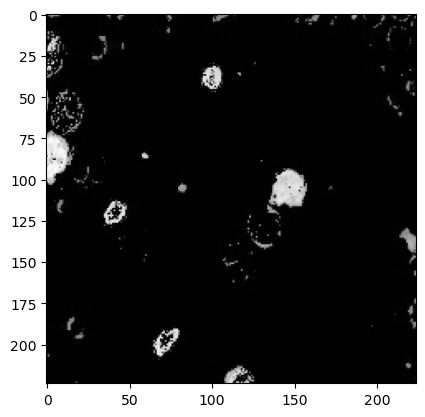

In [216]:
plot_image(7)

In [217]:
##EARLY##

In [218]:
folder_path = './Segmented/Early'

In [219]:
early_images = glob.glob(os.path.join(folder_path,"**","*.jpg"),recursive=True)
early_images

['C:\\Users\\sejan\\Downloads\\archive\\Segmented\\Early\\WBC-Malignant-Early-001.jpg',
 'C:\\Users\\sejan\\Downloads\\archive\\Segmented\\Early\\WBC-Malignant-Early-002.jpg',
 'C:\\Users\\sejan\\Downloads\\archive\\Segmented\\Early\\WBC-Malignant-Early-003.jpg',
 'C:\\Users\\sejan\\Downloads\\archive\\Segmented\\Early\\WBC-Malignant-Early-004.jpg',
 'C:\\Users\\sejan\\Downloads\\archive\\Segmented\\Early\\WBC-Malignant-Early-005.jpg',
 'C:\\Users\\sejan\\Downloads\\archive\\Segmented\\Early\\WBC-Malignant-Early-006.jpg',
 'C:\\Users\\sejan\\Downloads\\archive\\Segmented\\Early\\WBC-Malignant-Early-007.jpg',
 'C:\\Users\\sejan\\Downloads\\archive\\Segmented\\Early\\WBC-Malignant-Early-008.jpg',
 'C:\\Users\\sejan\\Downloads\\archive\\Segmented\\Early\\WBC-Malignant-Early-009.jpg',
 'C:\\Users\\sejan\\Downloads\\archive\\Segmented\\Early\\WBC-Malignant-Early-010.jpg',
 'C:\\Users\\sejan\\Downloads\\archive\\Segmented\\Early\\WBC-Malignant-Early-011.jpg',
 'C:\\Users\\sejan\\Downloads\\a

In [220]:
# feature engineering every image from the glob
image_array = []

for image in early_images:
    
    # open the image
    img = Image.open(image)
    
    # convert the image
    img = img.convert("L")
    
    # overwrite the image with its pixels
    img = img.getdata()
    
    # overwrite it again with an array form
    img = np.array(img)

    # over write again with normal values
    img = img/255

    image_array.append(img)

columns = [f'pixel{i+1}' for i in range(50176)]

early_frame = pd.DataFrame(image_array,columns=columns)

early_frame["diagnosis"] = "early"

In [221]:
early_frame

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel50168,pixel50169,pixel50170,pixel50171,pixel50172,pixel50173,pixel50174,pixel50175,pixel50176,diagnosis
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003922,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,early
1,0.003922,0.007843,0.000000,0.003922,0.007843,0.007843,0.003922,0.007843,0.003922,0.000000,...,0.698039,0.694118,0.682353,0.686275,0.682353,0.658824,0.654902,0.674510,0.694118,early
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.003922,0.000000,0.000000,0.003922,early
3,0.000000,0.019608,0.000000,0.000000,0.003922,0.000000,0.003922,0.000000,0.000000,0.000000,...,0.003922,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,early
4,0.003922,0.007843,0.011765,0.011765,0.011765,0.007843,0.011765,0.000000,0.000000,0.000000,...,0.721569,0.752941,0.713725,0.721569,0.721569,0.713725,0.690196,0.698039,0.670588,early
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,0.011765,0.003922,0.003922,0.007843,0.003922,0.007843,0.007843,0.000000,0.011765,0.011765,...,0.003922,0.007843,0.000000,0.000000,0.003922,0.000000,0.000000,0.003922,0.000000,early
981,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.003922,0.003922,0.003922,0.003922,0.000000,0.003922,0.003922,0.000000,0.003922,early
982,0.003922,0.000000,0.007843,0.003922,0.000000,0.011765,0.007843,0.007843,0.011765,0.007843,...,0.043137,0.003922,0.011765,0.015686,0.003922,0.019608,0.019608,0.007843,0.007843,early
983,0.007843,0.176471,0.509804,0.043137,0.015686,0.007843,0.003922,0.007843,0.011765,0.003922,...,0.011765,0.003922,0.007843,0.003922,0.007843,0.003922,0.003922,0.011765,0.007843,early


In [222]:
def plot_image(instance,df=early_frame):
    """ in this function you enter the instance of the early data frame that you want plotted """
    
    df = df.drop(columns="diagnosis")

    df = np.array(df.loc[instance]).reshape(224,224)

    plt.imshow(df,cmap="gray")
    plt.show()



    

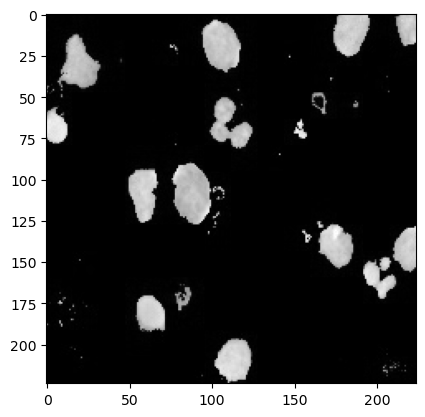

In [223]:
plot_image(7)

In [224]:
##PRE##

In [225]:
folder_path = './Segmented/Pre'

In [226]:
pre_images = glob.glob(os.path.join(folder_path,"**","*.jpg"),recursive=True)
pre_images

['C:\\Users\\sejan\\Downloads\\archive\\Segmented\\Pre\\WBC-Malignant-Pre-001.jpg',
 'C:\\Users\\sejan\\Downloads\\archive\\Segmented\\Pre\\WBC-Malignant-Pre-002.jpg',
 'C:\\Users\\sejan\\Downloads\\archive\\Segmented\\Pre\\WBC-Malignant-Pre-003.jpg',
 'C:\\Users\\sejan\\Downloads\\archive\\Segmented\\Pre\\WBC-Malignant-Pre-004.jpg',
 'C:\\Users\\sejan\\Downloads\\archive\\Segmented\\Pre\\WBC-Malignant-Pre-005.jpg',
 'C:\\Users\\sejan\\Downloads\\archive\\Segmented\\Pre\\WBC-Malignant-Pre-006.jpg',
 'C:\\Users\\sejan\\Downloads\\archive\\Segmented\\Pre\\WBC-Malignant-Pre-007.jpg',
 'C:\\Users\\sejan\\Downloads\\archive\\Segmented\\Pre\\WBC-Malignant-Pre-008.jpg',
 'C:\\Users\\sejan\\Downloads\\archive\\Segmented\\Pre\\WBC-Malignant-Pre-009.jpg',
 'C:\\Users\\sejan\\Downloads\\archive\\Segmented\\Pre\\WBC-Malignant-Pre-010.jpg',
 'C:\\Users\\sejan\\Downloads\\archive\\Segmented\\Pre\\WBC-Malignant-Pre-011.jpg',
 'C:\\Users\\sejan\\Downloads\\archive\\Segmented\\Pre\\WBC-Malignant-Pre-01

In [227]:
# feature engineering every image from the glob
image_array = []

for image in pre_images:
    
    # open the image
    img = Image.open(image)
    
    # convert the image
    img = img.convert("L")
    
    # overwrite the image with its pixels
    img = img.getdata()
    
    # overwrite it again with an array form
    img = np.array(img)

    # over write again with normal values
    img = img/255

    image_array.append(img)

columns = [f'pixel{i+1}' for i in range(50176)]

pre_frame = pd.DataFrame(image_array,columns=columns)

pre_frame["diagnosis"] = "pre"

In [228]:
pre_frame

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel50168,pixel50169,pixel50170,pixel50171,pixel50172,pixel50173,pixel50174,pixel50175,pixel50176,diagnosis
0,0.415686,0.039216,0.011765,0.015686,0.003922,0.007843,0.011765,0.011765,0.078431,0.007843,...,0.070588,0.513725,0.541176,0.305882,0.109804,0.003922,0.015686,0.172549,0.023529,pre
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.003922,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,pre
2,0.015686,0.011765,0.003922,0.000000,0.003922,0.000000,0.003922,0.003922,0.000000,0.011765,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.011765,0.011765,0.003922,0.007843,pre
3,0.533333,0.023529,0.015686,0.192157,0.023529,0.003922,0.015686,0.007843,0.019608,0.007843,...,0.007843,0.003922,0.074510,0.215686,0.007843,0.003922,0.027451,0.329412,0.290196,pre
4,0.007843,0.011765,0.007843,0.000000,0.007843,0.003922,0.003922,0.000000,0.003922,0.011765,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,pre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.000000,0.007843,0.007843,0.007843,...,0.603922,0.607843,0.615686,0.600000,0.596078,0.556863,0.533333,0.031373,0.019608,pre
959,0.003922,0.003922,0.003922,0.007843,0.019608,0.015686,0.011765,0.011765,0.003922,0.015686,...,0.000000,0.011765,0.003922,0.007843,0.003922,0.007843,0.000000,0.007843,0.015686,pre
960,0.000000,0.011765,0.000000,0.000000,0.007843,0.000000,0.003922,0.000000,0.000000,0.000000,...,0.533333,0.545098,0.537255,0.552941,0.545098,0.450980,0.509804,0.509804,0.541176,pre
961,0.007843,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.000000,0.003922,...,0.007843,0.011765,0.019608,0.000000,0.007843,0.015686,0.011765,0.007843,0.007843,pre


In [229]:
def plot_image(instance,df=pre_frame):
    """ in this function you enter the instance of the early data frame that you want plotted """
    
    df = df.drop(columns="diagnosis")

    df = np.array(df.loc[instance]).reshape(224,224)

    plt.imshow(df,cmap="gray")
    plt.show()

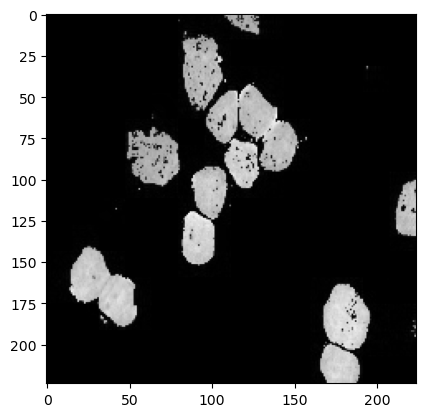

In [230]:
plot_image(7)


In [231]:
##PRO##

In [232]:
folder_path = './Segmented/Pro'

In [233]:
pro_images = glob.glob(os.path.join(folder_path,"**","*.jpg"),recursive=True)
pro_images

['C:\\Users\\sejan\\Downloads\\archive\\Segmented\\Pro\\WBC-Malignant-Pro-001.jpg',
 'C:\\Users\\sejan\\Downloads\\archive\\Segmented\\Pro\\WBC-Malignant-Pro-002.jpg',
 'C:\\Users\\sejan\\Downloads\\archive\\Segmented\\Pro\\WBC-Malignant-Pro-003.jpg',
 'C:\\Users\\sejan\\Downloads\\archive\\Segmented\\Pro\\WBC-Malignant-Pro-004.jpg',
 'C:\\Users\\sejan\\Downloads\\archive\\Segmented\\Pro\\WBC-Malignant-Pro-005.jpg',
 'C:\\Users\\sejan\\Downloads\\archive\\Segmented\\Pro\\WBC-Malignant-Pro-006.jpg',
 'C:\\Users\\sejan\\Downloads\\archive\\Segmented\\Pro\\WBC-Malignant-Pro-007.jpg',
 'C:\\Users\\sejan\\Downloads\\archive\\Segmented\\Pro\\WBC-Malignant-Pro-008.jpg',
 'C:\\Users\\sejan\\Downloads\\archive\\Segmented\\Pro\\WBC-Malignant-Pro-009.jpg',
 'C:\\Users\\sejan\\Downloads\\archive\\Segmented\\Pro\\WBC-Malignant-Pro-010.jpg',
 'C:\\Users\\sejan\\Downloads\\archive\\Segmented\\Pro\\WBC-Malignant-Pro-011.jpg',
 'C:\\Users\\sejan\\Downloads\\archive\\Segmented\\Pro\\WBC-Malignant-Pro-01

In [234]:
# feature engineering every image from the glob
image_array = []

for image in pro_images:
    
    # open the image
    img = Image.open(image)
    
    # convert the image
    img = img.convert("L")
    
    # overwrite the image with its pixels
    img = img.getdata()
    
    # overwrite it again with an array form
    img = np.array(img)

    # over write again with normal values
    img = img/255

    image_array.append(img)

columns = [f'pixel{i+1}' for i in range(50176)]

pro_frame = pd.DataFrame(image_array,columns=columns)

pro_frame["diagnosis"] = "pro"

In [235]:
pro_frame

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel50168,pixel50169,pixel50170,pixel50171,pixel50172,pixel50173,pixel50174,pixel50175,pixel50176,diagnosis
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,pro
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,pro
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,pro
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,pro
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,pro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,0.011765,0.066667,0.003922,0.011765,0.015686,0.003922,0.003922,0.003922,0.007843,0.003922,...,0.003922,0.019608,0.015686,0.003922,0.003922,0.007843,0.003922,0.007843,0.019608,pro
800,0.007843,0.015686,0.023529,0.047059,0.086275,0.007843,0.003922,0.003922,0.003922,0.015686,...,0.000000,0.003922,0.003922,0.003922,0.003922,0.007843,0.007843,0.007843,0.023529,pro
801,0.027451,0.058824,0.439216,0.054902,0.003922,0.023529,0.007843,0.101961,0.505882,0.050980,...,0.011765,0.007843,0.007843,0.007843,0.003922,0.003922,0.003922,0.000000,0.000000,pro
802,0.023529,0.298039,0.447059,0.043137,0.003922,0.027451,0.007843,0.007843,0.011765,0.109804,...,0.011765,0.023529,0.007843,0.035294,0.031373,0.494118,0.498039,0.239216,0.003922,pro


In [236]:
def plot_image(instance,df=pro_frame):
    """ in this function you enter the instance of the early data frame that you want plotted """
    
    df = df.drop(columns="diagnosis")

    df = np.array(df.loc[instance]).reshape(224,224)

    plt.imshow(df,cmap="gray")
    plt.show()

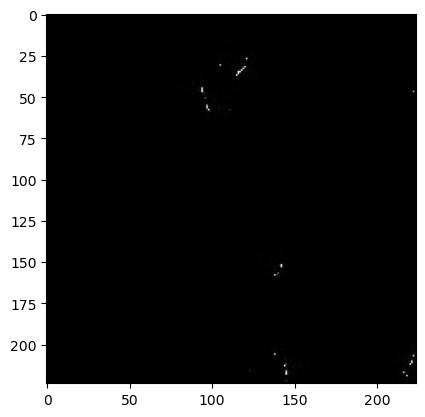

In [237]:
plot_image(7)


In [238]:
combined_df = pd.concat([benign_frame, early_frame, pre_frame, pro_frame], ignore_index=True)
display(combined_df)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel50168,pixel50169,pixel50170,pixel50171,pixel50172,pixel50173,pixel50174,pixel50175,pixel50176,diagnosis
0,0.003922,0.003922,0.003922,0.003922,0.003922,0.007843,0.000000,0.003922,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,benign
1,0.031373,0.388235,0.035294,0.019608,0.003922,0.000000,0.007843,0.003922,0.015686,0.007843,...,0.019608,0.556863,0.745098,0.764706,0.760784,0.772549,0.745098,0.733333,0.709804,benign
2,0.003922,0.007843,0.003922,0.003922,0.015686,0.011765,0.023529,0.498039,0.513725,0.505882,...,0.015686,0.003922,0.007843,0.003922,0.011765,0.003922,0.003922,0.003922,0.007843,benign
3,0.007843,0.003922,0.011765,0.058824,0.050980,0.031373,0.007843,0.015686,0.003922,0.015686,...,0.282353,0.105882,0.258824,0.019608,0.007843,0.003922,0.011765,0.007843,0.003922,benign
4,0.011765,0.035294,0.541176,0.541176,0.470588,0.494118,0.478431,0.494118,0.345098,0.035294,...,0.027451,0.011765,0.000000,0.129412,0.027451,0.003922,0.015686,0.007843,0.011765,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3251,0.011765,0.066667,0.003922,0.011765,0.015686,0.003922,0.003922,0.003922,0.007843,0.003922,...,0.003922,0.019608,0.015686,0.003922,0.003922,0.007843,0.003922,0.007843,0.019608,pro
3252,0.007843,0.015686,0.023529,0.047059,0.086275,0.007843,0.003922,0.003922,0.003922,0.015686,...,0.000000,0.003922,0.003922,0.003922,0.003922,0.007843,0.007843,0.007843,0.023529,pro
3253,0.027451,0.058824,0.439216,0.054902,0.003922,0.023529,0.007843,0.101961,0.505882,0.050980,...,0.011765,0.007843,0.007843,0.007843,0.003922,0.003922,0.003922,0.000000,0.000000,pro
3254,0.023529,0.298039,0.447059,0.043137,0.003922,0.027451,0.007843,0.007843,0.011765,0.109804,...,0.011765,0.023529,0.007843,0.035294,0.031373,0.494118,0.498039,0.239216,0.003922,pro


In [239]:
def plot_image(instance,df=combined_df):
    """ in this function you enter the instance of the early data frame that you want plotted """
    
    df = df.drop(columns="diagnosis")

    df = np.array(df.loc[instance]).reshape(224,224)

    plt.imshow(df,cmap="gray")
    plt.show()

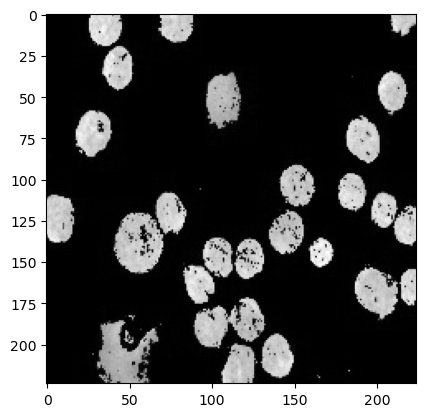

In [240]:
plot_image(2000)

In [241]:
from sklearn.utils import shuffle
true_df = shuffle(combined_df)

In [242]:
true_df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel50168,pixel50169,pixel50170,pixel50171,pixel50172,pixel50173,pixel50174,pixel50175,pixel50176,diagnosis
762,0.011765,0.000000,0.003922,0.000000,0.019608,0.031373,0.474510,0.050980,0.125490,0.356863,...,0.101961,0.007843,0.019608,0.015686,0.023529,0.047059,0.341176,0.247059,0.019608,early
2162,0.000000,0.000000,0.000000,0.000000,0.003922,0.003922,0.003922,0.003922,0.007843,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,pre
1541,0.011765,0.011765,0.011765,0.019608,0.490196,0.639216,0.654902,0.654902,0.647059,0.662745,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,pre
1346,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007843,...,0.000000,0.003922,0.007843,0.007843,0.007843,0.003922,0.003922,0.007843,0.007843,early
2131,0.003922,0.000000,0.003922,0.003922,0.003922,0.003922,0.000000,0.003922,0.003922,0.015686,...,0.596078,0.623529,0.635294,0.654902,0.666667,0.631373,0.623529,0.552941,0.121569,pre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1987,0.003922,0.003922,0.003922,0.003922,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,pre
934,0.007843,0.003922,0.003922,0.011765,0.015686,0.007843,0.003922,0.003922,0.003922,0.000000,...,0.000000,0.000000,0.007843,0.000000,0.003922,0.007843,0.000000,0.011765,0.105882,early
2652,0.003922,0.007843,0.007843,0.003922,0.003922,0.003922,0.000000,0.003922,0.015686,0.019608,...,0.007843,0.015686,0.011765,0.015686,0.023529,0.011765,0.007843,0.015686,0.003922,pro
1207,0.286275,0.054902,0.011765,0.003922,0.000000,0.003922,0.007843,0.015686,0.000000,0.003922,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,early


In [243]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [244]:
#Ensure `true_df` exists before proceeding
try:
    true_df
except NameError:
    raise ValueError("Error: `true_df` not found. Ensure `merge_testing.ipynb` has been run correctly.")

In [245]:
# Separate features (X) and target labels (y)
X = true_df.drop("diagnosis", axis=1)  # Feature matrix (all pixel values)
y = true_df["diagnosis"]  # Target labels (categorical)

In [247]:
# Step 1: One-Hot Encoding
# Convert y labels to a NumPy array for encoding
y_array = np.array(y).reshape(-1, 1)

# Apply One-Hot Encoding
one_hot_encoder = OneHotEncoder(sparse_output=False)
y_encoded = one_hot_encoder.fit_transform(y_array)

# Print One-Hot Encoded Labels
print("One-Hot Encoding Completed!")
print("One-Hot Encoded Labels (first 5 rows):\n", y_encoded[:5])

One-Hot Encoding Completed!
One-Hot Encoded Labels (first 5 rows):
 [[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]


In [249]:
# Step 2: Split the Data (80% Training, 20% Testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded,  
    test_size=0.2,
    random_state=42,
    stratify=y  # Maintain class distribution
)

In [251]:
# Print One-Hot Encoded Class Mapping
print("One-Hot Encoding Completed!")

# Get class labels
class_labels = one_hot_encoder.categories_[0]

# Create dictionary mapping class names to their one-hot encoded format
class_mapping = {label: one_hot_encoder.transform([[label]]).tolist()[0] for label in class_labels}

# Print the mapping
print("\nClass Mapping (One-Hot Encoded):")
for label, encoding in class_mapping.items():
    print(f"{label}: {encoding}")

One-Hot Encoding Completed!

Class Mapping (One-Hot Encoded):
benign: [1.0, 0.0, 0.0, 0.0]
early: [0.0, 1.0, 0.0, 0.0]
pre: [0.0, 0.0, 1.0, 0.0]
pro: [0.0, 0.0, 0.0, 1.0]


In [253]:
# Print Shapes to Verify the Split
print("\nTraining set:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("\nTesting set:")
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)



Training set:
X_train shape: (2604, 50176)
y_train shape: (2604, 4)

Testing set:
X_test shape: (652, 50176)
y_test shape: (652, 4)


In [255]:
# Convert One-Hot Encoded `y_train` & `y_test` back to class labels to check distribution
y_train_labels = np.argmax(y_train, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

print("\nClass distribution in training set:")
print(pd.Series(y_train_labels).value_counts(normalize=True))

print("\nClass distribution in testing set:")
print(pd.Series(y_test_labels).value_counts(normalize=True))


Class distribution in training set:
1    0.302611
2    0.295699
3    0.246928
0    0.154762
Name: proportion, dtype: float64

Class distribution in testing set:
1    0.302147
2    0.296012
3    0.246933
0    0.154908
Name: proportion, dtype: float64
